Завдання 9. Виконати інтерполяцію функції, задану в табличній формі в п'яти точках (див. 
нижче). Розрахунки виконати в середовищі Python.

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [8]:
# Вектори даних
x = np.array([0.1, 0.3, 0.4, 0.6, 0.7])
y = np.array([3.2, 3.0, 1.0, 1.8, 1.9])

In [9]:
# Створення інтерполяційного поліному 4-го ступеня
# Використовуємо поліноміальну інтерполяцію Ньютона
def newton_interpolation(x, y, degree=4):
    n = len(x)
    # Створення матриці різниць
    diff_table = np.zeros([n, n])
    diff_table[:, 0] = y
    
    # Заповнення таблиці різниць
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i, j] = (diff_table[i+1, j-1] - diff_table[i, j-1]) / (x[i+j] - x[i])
    
    # Функція інтерполяції
    def interpolate_point(x_point):
        result = diff_table[0, 0]
        product_term = 1
        for j in range(1, n):
            product_term *= (x_point - x[j-1])
            result += diff_table[0, j] * product_term
        return result
    
    return interpolate_point

In [10]:
# Створення інтерполяційної функції
interpolation_func = newton_interpolation(x, y)

In [11]:
# Точки для інтерполяції
x_interpolate = np.array([0.2, 0.5])

In [12]:
# Обчислення значень у проміжних точках
y_interpolate = [interpolation_func(xi) for xi in x_interpolate]

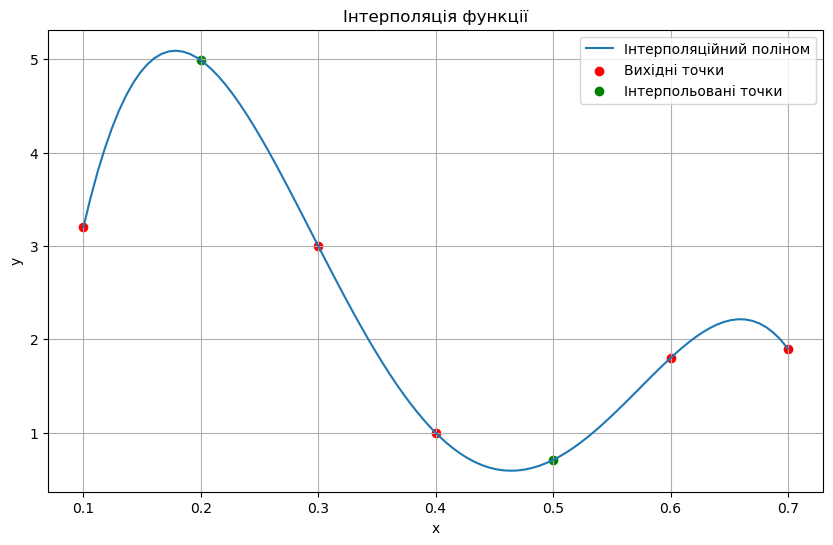

In [13]:
# Побудова графіка
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [interpolation_func(xi) for xi in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Інтерполяційний поліном')
plt.scatter(x, y, color='red', label='Вихідні точки')
plt.scatter(x_interpolate, y_interpolate, color='green', label='Інтерпольовані точки')
plt.title('Інтерполяція функції')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Додаткова перевірка за допомогою вбудованої функції NumPy
poly_coeffs = np.polyfit(x, y, 4)
poly_func = np.poly1d(poly_coeffs)

print("\nКоефіцієнти поліному:")
print(poly_coeffs)

print("\nПеревірка вбудованою функцією:")
for xi, yi in zip(x_interpolate, y_interpolate):
    print(f"x = {xi}: y = {poly_func(xi)}")


Коефіцієнти поліному:
[-852.77777778 1480.55555556 -864.02777778  186.25         -8.18      ]

Перевірка вбудованою функцією:
x = 0.2: y = 4.988888888888962
x = 0.5: y = 0.7088888888889002
